In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import json
import numpy as np
from numpy.linalg import norm
from pylab import meshgrid,cm
from math import exp
import random
import sys
from copy import copy
import pandas as pd
%matplotlib notebook


from sklearn.model_selection import train_test_split

# WSI - ćwiczenie 4, regresja i klasyfikacja

***

### Tomasz Frankowski

***

## Cel ćwiczenia
Celem ćwiczenia jest implementacja drzew decyzyjnych tworzonych algorytmem
ID3 z ograniczeniem maksymalnej głębokości drzewa

### Wczytanie danych

In [3]:
data = pd.read_csv("breast-cancer.data") #importing the dataset from the disk

data.head(10) #viewing some row of the dataset

        
# delete all rows with not certain info
#data.drop(data.index[data['line_race'] == 0], inplace = True)

#data = data[data.line_race != "?"]

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


### Czyszczenie i formatowanie danych

In [4]:
# clear rows with not declared data
for column in data.columns:
    print(f"feature: {column}")
    
    data.drop(data.index[data[column] == "?"], inplace = True)
    
    for value in np.unique(data[column].values):
        print(value)

# covert int type to string
data["deg-malig"] = data["deg-malig"].astype(str)

feature: Class
no-recurrence-events
recurrence-events
feature: age
20-29
30-39
40-49
50-59
60-69
70-79
feature: menopause
ge40
lt40
premeno
feature: tumor-size
0-4
10-14
15-19
20-24
25-29
30-34
35-39
40-44
45-49
5-9
50-54
feature: inv-nodes
0-2
12-14
15-17
24-26
3-5
6-8
9-11
feature: node-caps
no
yes
feature: deg-malig
1
2
3
feature: breast
left
right
feature: breast-quad
central
left_low
left_up
right_low
right_up
feature: irradiat
no
yes


### Podział danych na zbiór treningowy, walidacyjny i testujący
Zbiory pierwotnie podzieliłem na równe fragmenty.

In [5]:
train_data, test_data = train_test_split(data, test_size=0.66)
test_data, validate_data = train_test_split(test_data, test_size=0.5)
display(train_data)
display(test_data)
display(validate_data)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
93,no-recurrence-events,60-69,ge40,20-24,0-2,no,2,right,left_up,no
198,no-recurrence-events,50-59,ge40,15-19,0-2,yes,2,left,central,yes
211,recurrence-events,50-59,ge40,20-24,0-2,no,2,right,central,no
270,recurrence-events,50-59,ge40,30-34,6-8,yes,3,left,right_low,no
108,no-recurrence-events,40-49,premeno,30-34,0-2,no,3,right,right_up,no
...,...,...,...,...,...,...,...,...,...,...
258,recurrence-events,50-59,ge40,30-34,6-8,yes,2,left,right_low,yes
280,recurrence-events,50-59,ge40,40-44,6-8,yes,3,left,left_low,yes
204,recurrence-events,50-59,premeno,25-29,0-2,no,2,left,right_up,no
23,no-recurrence-events,50-59,premeno,40-44,0-2,no,2,left,left_up,no


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
109,no-recurrence-events,60-69,ge40,30-34,0-2,no,1,right,left_up,no
170,no-recurrence-events,30-39,premeno,20-24,3-5,yes,2,right,left_up,yes
63,no-recurrence-events,20-29,premeno,35-39,0-2,no,2,right,right_up,no
128,no-recurrence-events,50-59,premeno,25-29,0-2,yes,2,left,left_up,no
83,no-recurrence-events,50-59,ge40,15-19,0-2,no,2,right,left_low,no
...,...,...,...,...,...,...,...,...,...,...
135,no-recurrence-events,30-39,premeno,20-24,3-5,no,2,right,central,no
34,no-recurrence-events,50-59,ge40,10-14,0-2,no,1,left,left_up,no
274,recurrence-events,60-69,ge40,30-34,3-5,yes,2,left,central,yes
154,no-recurrence-events,30-39,lt40,15-19,0-2,no,3,right,left_up,no


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
191,no-recurrence-events,40-49,premeno,25-29,0-2,no,2,left,left_up,yes
27,no-recurrence-events,60-69,ge40,25-29,0-2,no,3,right,left_up,no
147,no-recurrence-events,50-59,premeno,30-34,3-5,yes,2,left,left_low,yes
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
153,no-recurrence-events,60-69,ge40,15-19,0-2,no,3,right,left_up,yes
...,...,...,...,...,...,...,...,...,...,...
136,no-recurrence-events,30-39,premeno,40-44,3-5,no,3,right,right_up,yes
22,no-recurrence-events,30-39,premeno,25-29,0-2,no,2,right,left_low,no
61,no-recurrence-events,40-49,premeno,10-14,0-2,no,1,right,right_low,no
137,no-recurrence-events,40-49,premeno,5-9,0-2,no,1,left,left_low,yes


## Drzewo ID3


### Obliczanie całkowitej entropi zbioru

In [6]:
# total entropy of data set with certain label and its attributes
def total_entropy(train_data_t, label, attributes):
    rows = train_data_t.shape[0]
    entropy = 0
    
    for attribute in attributes:
        attribute_count = train_data_t[train_data_t[label] == attribute].shape[0]

        entropy += - (attribute_count/train_data_t.shape[0])*np.log2(attribute_count/train_data_t.shape[0])
    
    return entropy

In [7]:
total_entropy(test_data, "irradiat", ["yes", "no"])

0.7979519684655731

### Obliczanie entropi dla konretnej cechy zbioru

In [8]:
# Each attribute entropy
def attribute_entropy(feature_data, label, attributes):
    rows = feature_data.shape[0]
    entropy = 0
    
    for attribute in attributes:
        label_class_count = feature_data[feature_data[label] == attribute].shape[0]
        entropy_class = 0
        
        if label_class_count != 0:
            entropy_class = - (label_class_count/rows) * np.log2(label_class_count/rows)  #entropy
        entropy += entropy_class
    return entropy

### Obliczanie korzyści informacyjnej cechy z danym atrybutem    

In [9]:
def gain(feature_name, train_data_t, label, label_attributes):
    # Get all attribute of this feature
    column_values = train_data_t[feature_name].values
    attributes = np.unique(column_values)
    
    # Get total entropy of data set
    tot_entropy = total_entropy(train_data_t, label, label_attributes)
    
    rows = train_data_t[feature_name].shape[0]
    infGain = 0
    
    # for each unique attribute in data set column
    for attribute in attributes:
        feature_column = train_data_t[train_data_t[feature_name] == attribute]
        infGain += -(feature_column.shape[0]/rows)*attribute_entropy(feature_column,  label, label_attributes)
    infGain += tot_entropy
    return infGain

### Znajdowanie najbardziej informatywnej cechy

In [10]:
def best_feature(train_data_t, label, label_attributes):
    best_feature = ""
    best_gain = 0
    
    for column in train_data_t.columns:
        temp_gain = gain(column, train_data_t,  label, label_attributes)

        if temp_gain>best_gain and label != column:
            best_gain = temp_gain
            best_feature = column
    return temp_gain, best_feature

### Znajdowanie atrybutu o określonym rezultacie

In [11]:
def find_pure_class(train_data_t, feature_name, label, label_attributes):
    rows = 0
    pure_classes = list()
    classses = list()
    not_pure_classes = list()
    isPure = False
    
    # Get all feature unique attributes
    for attribute in np.unique(train_data_t[feature_name].values):
        
        # Get rows with only feature attribute
        attribute_row = train_data_t[train_data_t[feature_name] == attribute]   
        rows = attribute_row.shape[0]
        
        # Check if attribute is pure
        for label_attribute in label_attributes:
            label_class_count = attribute_row[attribute_row[label] == label_attribute].shape[0] #row count of class c 

            if label_class_count == rows:
                pure_classes.append(attribute)
                classses.append(label_attribute)
                isPure = True
                
        if isPure == False:
            not_pure_classes.append(attribute)
        else:
            isPure = False
    
    return ((pure_classes, classses), (not_pure_classes,))

### Obliczanie ilości występowanie atrybutów docelowej cechy

In [12]:
def get_label_amount(train_data_t, label, feature_name, label_attributes, feature_attribute):
    labels_amount = list()
    attribute_row = train_data_t[train_data_t[feature_name] == feature_attribute]
    for label_attribute in label_attributes:
        label_class_count = attribute_row[attribute_row[label] == label_attribute].shape[0] #row count of class c 
        labels_amount.append(label_class_count)
    return labels_amount

### Funkcja odpowiedzialna za generacje drzewa ID3

#### Drzewo to będzie generowane w formie słownika, za pomocą którego będzie dochodzić do predykcji wyniku.

In [66]:
def create_tree(train_data_t, label, label_attributes, tree, depth, desired_depth):
    depth +=1
    
    # find new root feature and pure/not pure attributes
    gain_2, root_feature = best_feature(train_data_t,  label, label_attributes)
    
    # leaf result in not clear so choose random label attribute
    if root_feature == "":
        return random.choice(label_attributes)
        
    pure_classes, not_pure_classes = find_pure_class(train_data_t, root_feature, label, label_attributes)

    # Check if tree has reached desired depth
    if depth >= desired_depth:
        
        # for all pure attributes, add them to tree and close their leaf
        for (attribute, label) in zip(pure_classes[0], pure_classes[1]):
            if root_feature in tree:
                tree[root_feature][attribute] = label
            else:   
                tree[root_feature] = {attribute: label}  
        
        # if depth is reached, for all not pure attributes, add them to tree and close their leafs
        # if yes_num > no_num than close value is yes, if they are equal than chose random
        for attribute in not_pure_classes[0]:
            labels = get_label_amount(train_data_t, "irradiat", root_feature, label_attributes, attribute)
            
            if root_feature in tree:
                if labels[0] > labels[1]:
                    tree[root_feature][attribute] = label_attributes[0]
                elif labels[0] < labels[1]:
                    tree[root_feature][attribute] = label_attributes[1]
                else:
                    tree[root_feature][attribute] = random.choice(label_attributes)
            else:
                if labels[0] > labels[1]:
                    tree[root_feature] = {attribute: label_attributes[0]}
                elif labels[0] < labels[1]:
                    tree[root_feature] = {attribute: label_attributes[1]}
                else:
                    tree[root_feature] = {attribute: random.choice(label_attributes)}
        return tree
    
    else:
        
        # Check if anything is left on leaf
        
        # for all pure attributes, add them to tree and close their leaf
        for (attribute, label) in zip(pure_classes[0], pure_classes[1]):
            if root_feature in tree:
                tree[root_feature][attribute] = label
            else:   
                tree[root_feature] = {attribute: label}

        # for not pure attributes add empty leaf to tree
        for attribute in not_pure_classes[0]:
            if(attribute != ''):
                if root_feature in tree:
                    tree[root_feature][attribute] = {}
                else:
                    tree[root_feature] = {attribute: {}}

            
    # for every not pure class go deeper into tree until end of leaf is reached or depth is reached
    for not_pure in not_pure_classes[0]:
        
        # get data without root feature column and only with rows that had not_pure attribute
        attribute_row = train_data_t[train_data_t[root_feature] == not_pure] 
        train_data_without_feature = (attribute_row.loc[:, attribute_row.columns != root_feature])
        temp_tree = copy(tree[root_feature][not_pure]);
        # go deeper into tree
        prev_feature = copy(root_feature)
        temp_tree = create_tree(train_data_without_feature, "irradiat", label_attributes, temp_tree, depth, desired_depth)
        
        # add branch to tree
        tree[root_feature][not_pure] = copy(temp_tree)
    return tree;

In [102]:
main_tree = {}
tree = create_tree(train_data, "irradiat", ["yes", "no"], main_tree, 1, 4)
# visualize tree
print(json.dumps(tree, indent = 2))

{
  "inv-nodes": {
    "12-14": "yes",
    "15-17": "no",
    "0-2": {
      "node-caps": {
        "yes": "yes",
        "no": {
          "tumor-size": {
            "0-4": "no",
            "10-14": "no",
            "20-24": "no",
            "35-39": "no",
            "40-44": "no",
            "5-9": "no",
            "50-54": "no",
            "15-19": "no",
            "25-29": "no",
            "30-34": "no"
          }
        }
      }
    },
    "3-5": {
      "age": {
        "30-39": "yes",
        "60-69": "yes",
        "40-49": {
          "tumor-size": {
            "20-24": "yes",
            "30-34": "no"
          }
        },
        "50-59": {
          "menopause": {
            "ge40": "no",
            "premeno": "yes"
          }
        }
      }
    },
    "6-8": {
      "tumor-size": {
        "30-34": "no",
        "35-39": "no",
        "40-44": "yes"
      }
    },
    "9-11": {
      "tumor-size": {
        "25-29": "no",
        "30-34": "yes",
      

### Funkcje ewaluacji otrzymanego drzewa

In [15]:
def predict_result(tree, instance):
    
    # tree leaf node
    if not isinstance(tree, dict): 
        return tree
    else:
        
        # get root feature
        root_feature = next(iter(tree))
        feature_value = instance[root_feature]
        
        # Check if feature_value is in our tree
        if feature_value in tree[root_feature]:
            return predict_result(tree[root_feature][feature_value], instance)
        else:
            return None

In [86]:
# get evaluation precision recall values
def evaluation_precision_recall(tree, test_data_t, label, label_attributes):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    results = list()
    i = 0
    for index, row in test_data_t.iterrows():
        result = predict_result(tree, test_data_t.iloc[i])
        if result == test_data_t[label].iloc[i]:

            if result == label_attributes[0]:
                results.append((1,1))
            else:
                results.append((0,0))

        else:

            if result == label_attributes[0]:
                results.append((1,0))
            else:
                results.append((0,1))

        i +=1
    
    for result in results:
        if(result[0] == result[1] == 1):
            tp+=1
        elif(result[0] == result[1] == 0):
            tn +=1
        elif(result[0] > result[1]):
            fp +=1
        else:
            fn +=1
            
    precision = 0
    recall = 0
    accuracy = (tp + tn)/(tp+fn+fp+tn)
    if(tp==0):
        precision = 1
    else:
        precision = tp/(tp+fp)
    if(tn==0):
        recall = 1
    else:
        recall = tp/(tp+fn)
    F1 = tp/(tp + (fn + fp)/2)
    return accuracy, precision, recall, F1

### Ewaluacja drzewa decyzyjnego

Podczas ewaluacji wyznaczam:
- dokładność modelu - stosunek przewidzianych wyników względem wszystkich prób
- precyzję modelu - stosunek prawidłowo zaprognozowanych pozytywnych wartości przez sumę wszystkich zaprognozowanych pozytywnie
- czułość modelu - stosunek prawidłowo zaprognozowanych przypadków pozytywnych wśród wszystkich przypadków pozytywnych 
- F1 - średnia harmoniczna pomiędzy precyzją i czułością <br><br>
Dla wszystkich miar, im bliżej wartości 1 tym lepiej

In [103]:
accuracy, precision, recall, F1= evaluation_precision_recall(tree, test_data, 'irradiat', ["yes", "no"]) 
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {F1}")

Accuracy: 0.7472527472527473
Precision: 0.38461538461538464
Recall: 0.25
F1: 0.30303030303030304


Po przeprowadzniu testu modelu drzewa decyzyjnego na zbiorze testującym dla głębokości 4 widać, że wynik dokładności jest nie najgorszy. Problemem jednak jest wartość precyzji oraz czułości, ponieważ obie te wartości są stosunkowo małe i precyzja jest większa od czułości. W przypadku diagnozowania choroby, może to oznaczać że przeoczymy faktycznie chorą osobę.

## Funkcje odpowiedzialne za wyświetlanie rezultatów ewaluacji

Zbadanie wpływu głebokości drzewa na otrzymywane wyniki.

In [95]:
def plot_results(accuracy, recall, precision, F1, depth, title):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.plot(depth, precision)
    plt.plot(depth, recall)
    plt.plot(depth, accuracy)
    plt.plot(depth, F1)
    plt.legend(["precision", "recall", "accuracy", "F1"])
    plt.xlabel("depth")
    plt.title(title)
    plt.show()

In [96]:
train_data, test_data = train_test_split(data, test_size=0.66)
test_data, validate_data = train_test_split(test_data, test_size=0.5)

In [101]:
def test_ID3_model_depth(train_data_t, test_data_t, validate_data_t, IsValidate, IsTest):
    precision_plot = []
    recall_plot = []
    accuracy_plot = []
    depth_plot = []
    F1_plot = []
    if IsTest:
        for i in range(1, 9):
            tree = create_tree(train_data_t, "irradiat", ["yes", "no"], {}, 1, i)
            accuracy, precision, recall, F1 = evaluation_precision_recall(tree, test_data_t, 'irradiat', ["yes", "no"]) 
            precision_plot.append(precision)
            recall_plot.append(recall)
            accuracy_plot.append(accuracy)
            F1_plot.append(F1)
            depth_plot.append(i)
        plot_results(accuracy_plot, recall_plot, precision_plot,  F1_plot, depth_plot, "test data")


    precision_plot.clear()
    recall_plot.clear()
    accuracy_plot.clear()
    depth_plot.clear()
    F1_plot.clear()
    if IsValidate:
        for i in range(1, 9):
            tree = create_tree(train_data_t, "irradiat", ["yes", "no"], {}, 1, i)
            accuracy, precision, recall, F1 = evaluation_precision_recall(tree, validate_data_t, 'irradiat', ["yes", "no"]) 
            precision_plot.append(precision)
            recall_plot.append(recall)
            accuracy_plot.append(accuracy)
            depth_plot.append(i)
            F1_plot.append(F1)
        plot_results(accuracy_plot, recall_plot, precision_plot, F1_plot, depth_plot, "validate data")

## Test jakości modelu względem głębokości drzewa

Wyznacze najlepszy model w zależności od głębokości drzewa decyzyjnego. Do wyznaczniu modelu posłużę się zbiorem walidacyjnym.

<IPython.core.display.Javascript object>


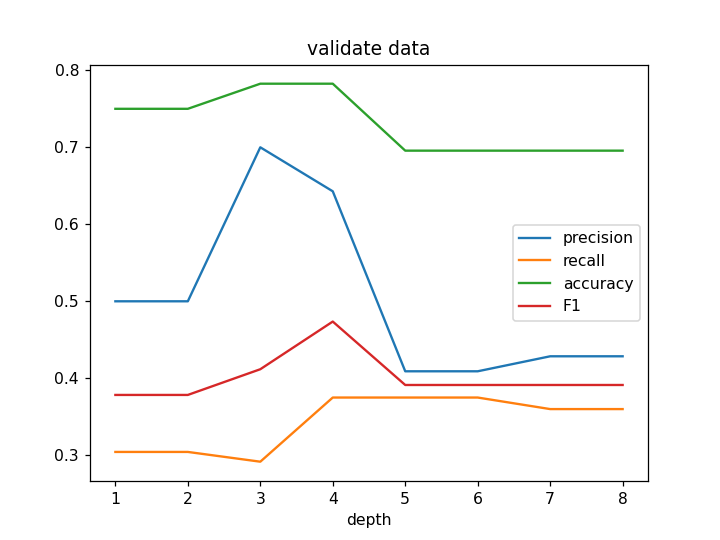

In [100]:
test_ID3_model_depth(train_data, test_data, validate_data, True, False)

Z wykresów widać że model drzewa decyzyjnego jest najlepszy dla głębokości równej 4. Ponieważ wartość F1, czułości i dokładności są największe. Dla głębokości 5 widać znaczny spadek jakości predykcji co oznacza przeuczenie modelu. Dlatego dla dalszych badań będę używał modelu o głębokości 4.

## Porównaniu drzewa decyzyjnego dla zbioru uczącego, testowego i walidacyjnego

In [108]:
main_tree = {}
tree = create_tree(train_data, "irradiat", ["yes", "no"], main_tree, 1, 4)
accuracy, precision, recall, F1= evaluation_precision_recall(tree, train_data, 'irradiat', ["yes", "no"]) 
print("TRAIN DATA")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {F1}")
print("\n")
accuracy, precision, recall, F1= evaluation_precision_recall(tree, test_data, 'irradiat', ["yes", "no"]) 
print("TEST DATA")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {F1}")
print("\n")
print("VALIDATE DATA")
accuracy, precision, recall, F1= evaluation_precision_recall(tree, validate_data, 'irradiat', ["yes", "no"]) 
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {F1}")

TRAIN DATA
Accuracy: 0.9361702127659575
Precision: 1.0
Recall: 0.7
F1: 0.8235294117647058


TEST DATA
Accuracy: 0.7472527472527473
Precision: 0.38461538461538464
Recall: 0.25
F1: 0.30303030303030304


VALIDATE DATA
Accuracy: 0.782608695652174
Precision: 0.6428571428571429
Recall: 0.375
F1: 0.47368421052631576


Zgodnie z przypuszczeniami model drzewa, najlepiej radzi sobie dla zbioru uczącego, ponieważ dla niego został on wyznaczony. Dla zbiory walidacyjnego jest wyraźnie gorzej niż dla uczącego ale też lepiej niż dla zbioru testowego, ponieważ wyznaczaliśmy głębokość modelu właśnie dla zbioru walidacyjnego.

## Test drzewa decyzyjnego dla różnych zbiorów 

In [109]:
test_accuracy_mean = []
test_precision_mean = []
test_recall_mean = []

train_accuracy_mean = []
train_precision_mean = []
train_recall_mean = []

validate_accuracy_mean = []
validate_precision_mean = []
validate_recall_mean = []

for i in range(1, 100):
    train_data, test_data = train_test_split(data, test_size=0.66)
    test_data, validate_data = train_test_split(test_data, test_size=0.5)
    main_tree = {}
    tree = create_tree(train_data, "irradiat", ["yes", "no"], main_tree, 1, 4)
    # Train data
    accuracy, precision, recall, F1= evaluation_precision_recall(tree, train_data, 'irradiat', ["yes", "no"]) 
    
    train_accuracy_mean.append(accuracy)
    train_precision_mean.append(precision)
    train_recall_mean.append(recall)
    
    # Test data
    accuracy, precision, recall, F1= evaluation_precision_recall(tree, test_data, 'irradiat', ["yes", "no"]) 
    
    test_accuracy_mean.append(accuracy)
    test_precision_mean.append(precision)
    test_recall_mean.append(recall)
    
    # Validate data
    accuracy, precision, recall, F1= evaluation_precision_recall(tree, validate_data, 'irradiat', ["yes", "no"]) 
    
    validate_accuracy_mean.append(accuracy)
    validate_precision_mean.append(precision)
    validate_recall_mean.append(recall)

print("TEST DATA")
print(f"Mean accuracy: {np.mean(test_accuracy_mean)}, +/- {np.std(test_accuracy_mean)}")
print(f"Mean recall: {np.mean(test_recall_mean)}, +/- {np.std(test_recall_mean)}")
print(f"Mean precision: {np.mean(test_precision_mean)}, +/- {np.std(test_precision_mean)}")
print("VALIDATE DATA")
print(f"Mean accuracy: {np.mean(validate_accuracy_mean)}, +/- {np.std(validate_accuracy_mean)}")
print(f"Mean recall: {np.mean(validate_recall_mean)}, +/- {np.std(validate_recall_mean)}")
print(f"Mean precision: {np.mean(validate_precision_mean)}, +/- {np.std(validate_precision_mean)}")
print("TRAIN DATA")
print(f"Mean accuracy: {np.mean(train_accuracy_mean)}, +/- {np.std(train_accuracy_mean)}")
print(f"Mean recall: {np.mean(train_recall_mean)}, +/- {np.std(train_recall_mean)}")
print(f"Mean precision: {np.mean(train_precision_mean)}, +/- {np.std(train_precision_mean)}")

TEST DATA
Mean accuracy: 0.6640026640026641, +/- 0.059723217493047445
Mean recall: 0.21495124268282803, +/- 0.09170656984765255
Mean precision: 0.3292573353871566, +/- 0.1369001600769234
VALIDATE DATA
Mean accuracy: 0.6764382960035132, +/- 0.062408939274068584
Mean recall: 0.23486248123508593, +/- 0.108173205625669
Mean precision: 0.3368629602147392, +/- 0.13579839855635678
TRAIN DATA
Mean accuracy: 0.9347732645604985, +/- 0.023211329204815844
Mean recall: 0.8011096062007824, +/- 0.09371407902498378
Mean precision: 0.9113030910016073, +/- 0.06126914714567275


Ze 100 testów widać że odchylenia wyników są znaczące. Ma na to wpływ podział naszych danych oraz ich ilość. W naszym przypadku było ich zdecydowanie za mało dlatego nie dało ich się odpowiednio podzielić, a przez to wyniki są mocno rozbieżne. 
Zgodnie z przypuszczeniami najlepsze wyniki są dla zbioru trenującego, a następnie dla walidacyjnego i testującego.